In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict

In [2]:
from scipy.stats import sem
import numpy as np

In [3]:
import pandas as pd

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'hal_tuning.pkl')
df_main_result = pd.read_pickle(f_main_result)

In [5]:
df_main_result

hal_tuning_analysis  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
relu     False                mse       0          2         8           1           cm-avg       1280                      None   
                                                                                                  2560                      None   
                                                                                                  5120                      None   
                                                                                     cm-last      1280                      None   
                                                                                                  2560                      None   
...                                                                                                                          ...   
softplus True                 poisson   1          6         16          1           legacy       2560                      None   
                                                                                                  5120                      None   
                                                             32          1           legacy       1280                      None   
                                                                                                  2560                      None   
                                                                                                  5120                      None   

                                                                                                              num_param  
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep             
relu     False                mse       0          2         8           1           cm-avg       1280            17461  
                                                                                                  2560            17461  
                                                                                                  5120            17461  
                                                                                     cm-last      1280            17461  
                                                                                                  2560            17461  
...                                                                                                                 ...  
softplus True                 poisson   1          6         16          1           legacy       2560            29837  
                                                                                                  5120            29837  
                                                             32          1           legacy       1280            67149  
                                                                                                  2560            67149  
                                                                                                  5120            67149  

[9648 rows x 2 columns]

In [6]:
def get_mean(x):
    if x is None:
        return np.nan
    return x['diffs'].mean()
def get_sem(x):
    if x is None:
        return np.nan
    return sem(x['diffs'], ddof=0)


df_main_result['hal_tuning_mean'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_mean(x))
df_main_result['hal_tuning_sem'] = df_main_result['hal_tuning_analysis'].map(lambda x: get_sem(x))

In [7]:
# show mean vs sem, for different cls

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

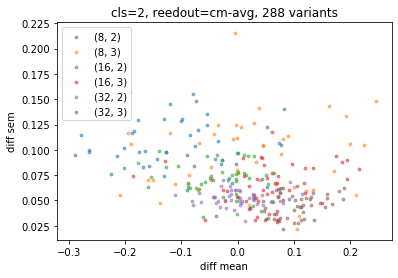

mean of mean over this readout 0.008253015666988562 mean of sem over this readout 0.07100821268442672


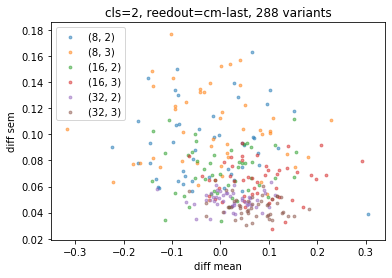

mean of mean over this readout 0.022025884502425246 mean of sem over this readout 0.0711714796977618


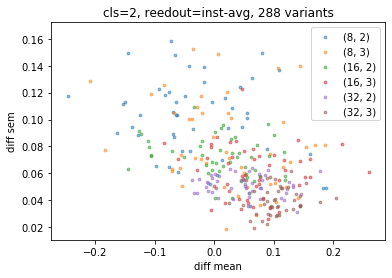

mean of mean over this readout 0.0372881379027539 mean of sem over this readout 0.06778184264727626


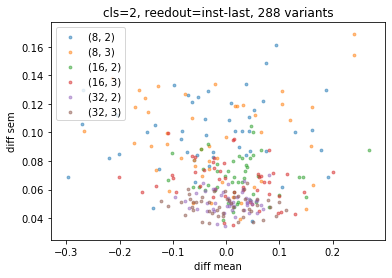

mean of mean over this readout -0.001096711241229754 mean of sem over this readout 0.0715182504756361


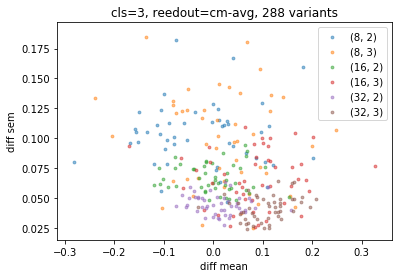

mean of mean over this readout 0.03325887345880178 mean of sem over this readout 0.070035039047878


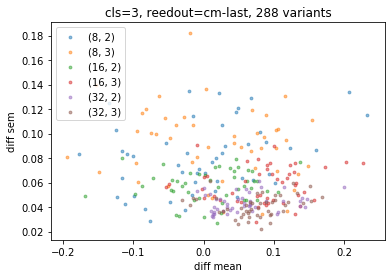

mean of mean over this readout 0.040346439390354205 mean of sem over this readout 0.06204961090714137


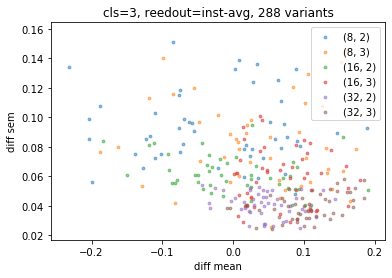

mean of mean over this readout 0.03943441340879997 mean of sem over this readout 0.06215236832163181


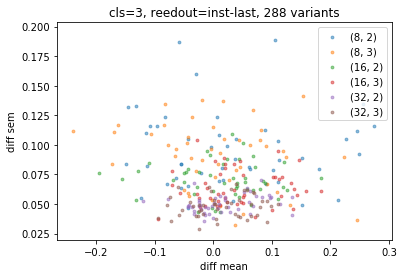

mean of mean over this readout 0.019881280918698438 mean of sem over this readout 0.06974527318313463


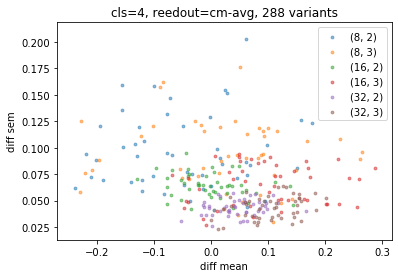

mean of mean over this readout 0.036638984243391216 mean of sem over this readout 0.06742823523055168


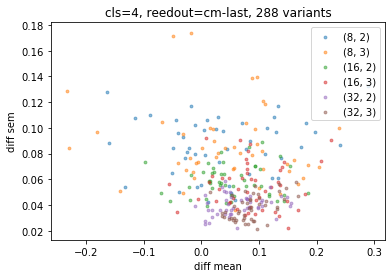

mean of mean over this readout 0.060282972412075794 mean of sem over this readout 0.060400678012354346


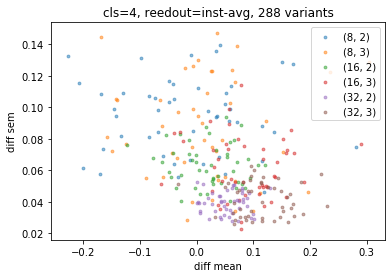

mean of mean over this readout 0.04501275211296264 mean of sem over this readout 0.06432855196044913


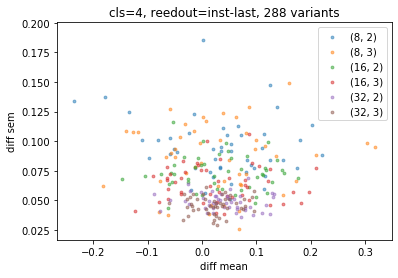

mean of mean over this readout 0.031879971425625535 mean of sem over this readout 0.06857089939518332


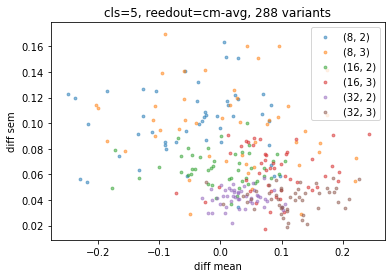

mean of mean over this readout 0.03518023297256933 mean of sem over this readout 0.06803509636765231


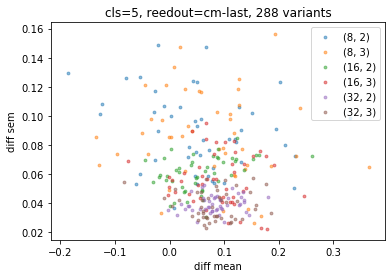

mean of mean over this readout 0.07311509686353988 mean of sem over this readout 0.06132023196029501


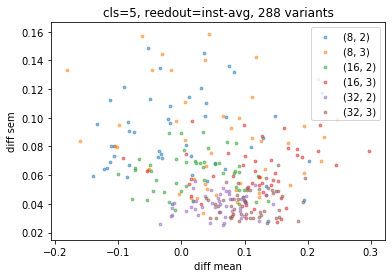

mean of mean over this readout 0.06004231061579127 mean of sem over this readout 0.062037488743365864


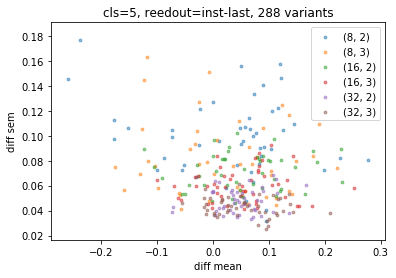

mean of mean over this readout 0.043218115695102366 mean of sem over this readout 0.06680384417887793


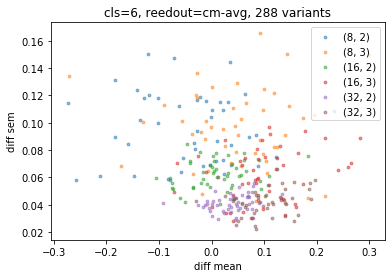

mean of mean over this readout 0.043055814822913985 mean of sem over this readout 0.06611730276166755


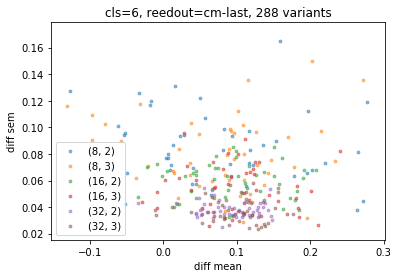

mean of mean over this readout 0.08871864279555582 mean of sem over this readout 0.05887795755697905


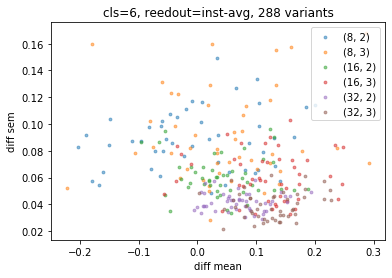

mean of mean over this readout 0.06758551402343721 mean of sem over this readout 0.0635018738188379


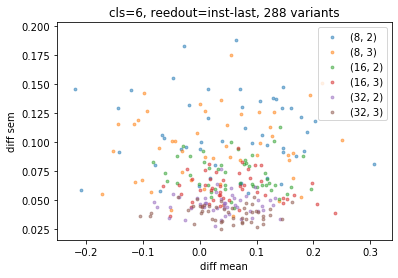

mean of mean over this readout 0.047160210194767294 mean of sem over this readout 0.07027643452521176


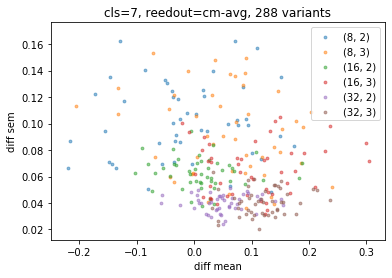

mean of mean over this readout 0.055238041973093996 mean of sem over this readout 0.06715401547500557


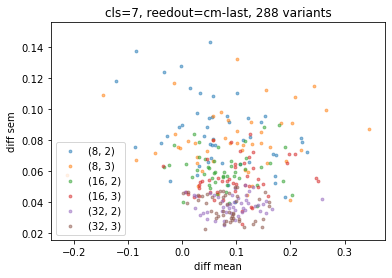

mean of mean over this readout 0.08565444761929313 mean of sem over this readout 0.05907225466305975


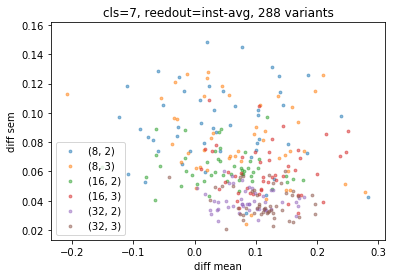

mean of mean over this readout 0.07970499007717294 mean of sem over this readout 0.06264875535301567


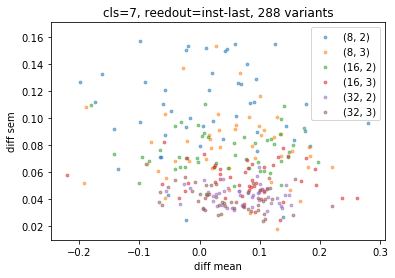

mean of mean over this readout 0.05068527869497613 mean of sem over this readout 0.06595390195010081


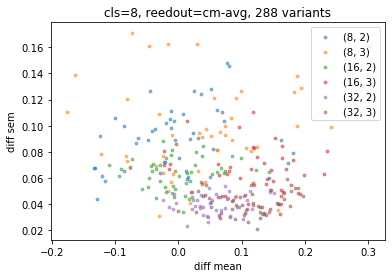

mean of mean over this readout 0.05417895732467475 mean of sem over this readout 0.06532672050788714


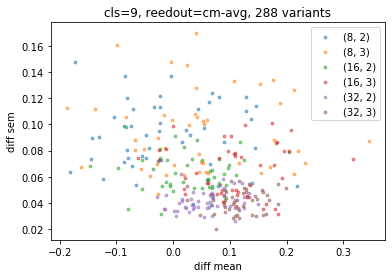

mean of mean over this readout 0.057931849561976265 mean of sem over this readout 0.06569341630947784


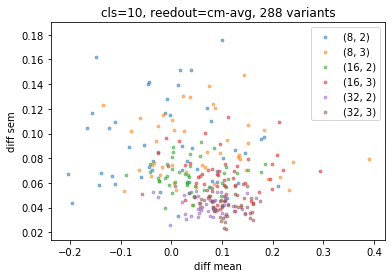

mean of mean over this readout 0.0638045495240059 mean of sem over this readout 0.06538034357649486


In [9]:
def show_scatter_plots():
    for cls in df_main_result.index.get_level_values('rcnn_bl_cls').unique():
        if cls == 1:
            continue
            
        df_this_main = df_main_result.xs(cls, level='rcnn_bl_cls')
        
        for readout_type in df_this_main.index.get_level_values('readout_type').unique():
            df_this_readout = df_this_main.xs(readout_type, level='readout_type')
            
            index_out_channel = df_this_readout.index.get_level_values('out_channel').values
            index_num_layer = df_this_readout.index.get_level_values('num_layer').values

            data_channel_layer = np.asarray([index_out_channel, index_num_layer]).T
            #     print(data_channel_layer.dtype, data_channel_layer.shape)
            unique_channel_layer = np.unique(data_channel_layer, axis=0).tolist()
        
            plt.close('all')
            
            for key_this in unique_channel_layer:
                key_this = tuple(key_this)
                (c_this, l_this) = key_this
                df_this = df_this_readout.xs(key=(c_this, l_this), level=('out_channel', 'num_layer'))
                assert len(df_this)*6 == len(df_this_readout)
                plt.scatter(
                    df_this['hal_tuning_mean'].values,
                    df_this['hal_tuning_sem'].values,
                    label=key_this,
                    alpha=0.5,
                    s=8
                )
            plt.legend(loc='best')
            plt.title(f'cls={cls}, reedout={readout_type}, {len(df_this_readout)} variants')
            plt.xlabel('diff mean')
            plt.ylabel('diff sem')
            plt.show()
        
            print('mean of mean over this readout', df_this_readout['hal_tuning_mean'].mean(), 'mean of sem over this readout', df_this_readout['hal_tuning_sem'].mean())
show_scatter_plots()